In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def likelihood(q):
    return exp(-q*q)
def loglikelihood(q):
    return -q*q
def gradient_loglikelihood(q):
    return -2*q
def leapfrog(q,p, delta_t=1E-1, niter=5):
    q_new = q
    p_new = p
    for i in range(niter):
        p_new = p_new + 0.5 * delta_t * gradient_loglikelihood(q_new)
        q_new = q_new + delta_t * p_new
        p_new = p_new + 0.5 * delta_t * gradient_loglikelihood(q_new)
    return q_new, p_new
def H(q,p):
    K = 0.5 * p * p
    U = -loglikelihood(q)
    return K + U

In [32]:
def MCMC(nsteps):
    q = np.zeros(nsteps)
    p = np.zeros(nsteps)
    p[0] = np.random.normal(0,1)
    q[0] = np.random.normal(0,1)
    for i in range(1,nsteps):
        p[i] = np.random.normal(0,1)
        q_new, p_new = leapfrog(q[i-1],p[i-1])
        E_new = H(q_new, p_new)
        E_old = H(q[i-1], p[i-1])
        alpha = min(1.0,np.exp(-E_new + E_old))
        beta = np.random.random()
        if beta < alpha:
            q[i] = q_new
        else:
            q[i] = q[i-1]
    return q

In [35]:
q_chain = MCMC(10000)

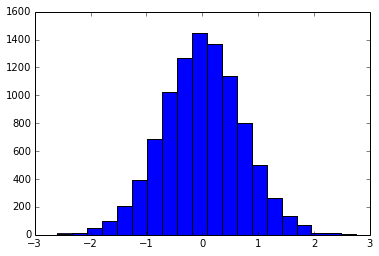

In [36]:
a = plt.hist(q_chain[500:], bins=20)